# 0. Run the backtest code

In [2]:
# Rb 5min test
# !python ../Main.py -o ../Results/Ag_15min_PriceThreshold -c ../Config/Ag_15min_PriceThreshold.json > /dev/null


/Applications/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
# sys.path.append('/home/runmin/Documents/Qishi/QishiQR/BacktestEngine/Engine')
sys.path.append('/Users/simone/Documents/GitHub/QishiQR_Folk/Simeng/BacktestEngine/')
sys.path.append('/Users/simone/Documents/GitHub/QishiQR_Folk/Simeng/BacktestEngine/Engine')

import matplotlib.pyplot as plt
from PostProcessing import GetResult
from PostProcessing import OffSetAverage

def PlotResult(TesterResults):
    for ID, tester in enumerate(TesterResults):
        print("Tester=",ID)
        
        params = tester["globalPara"]
        for key, item in tester["localPara"].items():
            print("{} = {}".format(key, item))

        fig, ax = plt.subplots(1,2,figsize=(20,6))
        tester["insample"].ensemble.ensembles[0].result.benchmark.plot(ax=ax[0])
        tester["insample"].plot(ax=ax[0])
        tester["outsample"].ensemble.ensembles[0].result.benchmark.plot(ax=ax[1])
        tester["outsample"].plot(ax=ax[1])
        
        ax[0].set_xlabel("Date")
        ax[0].set_title("Equity curve - Insample")
        ax[1].set_xlabel("Datae")
        ax[1].set_title("Equity curve - Outsample")
        plt.show()

    

# 1. Ag - 10min 

In [2]:
Ag_10min_result = GetResult("../Results/Ag_10min_PriceThreshold/")


Tester= 0 |file_path =  ../Results/Ag_10min_PriceThreshold/Result_0.pkl

Tester= 1 |file_path =  ../Results/Ag_10min_PriceThreshold/Result_1.pkl

Tester= 2 |file_path =  ../Results/Ag_10min_PriceThreshold/Result_2.pkl

Tester= 3 |file_path =  ../Results/Ag_10min_PriceThreshold/Result_3.pkl

Tester= 4 |file_path =  ../Results/Ag_10min_PriceThreshold/Result_4.pkl

Tester= 5 |file_path =  ../Results/Ag_10min_PriceThreshold/Result_5.pkl

Tester= 6 |file_path =  ../Results/Ag_10min_PriceThreshold/Result_6.pkl

Tester= 7 |file_path =  ../Results/Ag_10min_PriceThreshold/Result_7.pkl

Tester= 8 |file_path =  ../Results/Ag_10min_PriceThreshold/Result_8.pkl

Tester= 9 |file_path =  ../Results/Ag_10min_PriceThreshold/Result_9.pkl

Tester= 10 |file_path =  ../Results/Ag_10min_PriceThreshold/Result_10.pkl

Tester= 11 |file_path =  ../Results/Ag_10min_PriceThreshold/Result_11.pkl

Tester= 12 |file_path =  ../Results/Ag_10min_PriceThreshold/Result_12.pkl

Tester= 13 |file_path =  ../Results/Ag_10min

## 1.0 Ag - 10min offset average - group test results by price threshold

In [3]:
# len(Rb_5min_result)
# print(Rb_5min_result[0]['localPara'])
# Rb_5min_result[0]

In [4]:
NoCost_Result_Group = {10e-4:[],5e-4:[],0:[]}
FixedCost_Result_Group = {10e-4:[],5e-4:[],0:[]}

for result in Ag_10min_result:
    price_threshold = result['localPara']['price_threshold']
    if result['localPara']['fixed_cost']:
        FixedCost_Result_Group[price_threshold].append(result)
    else:
        NoCost_Result_Group[price_threshold].append(result)
    

---
# 1 NO trading cost

## 1.1 Ag --- 10min offset average --- price threshold = 10bps

Text(0.5,1,'Equity_Curve - Outsample - OffsetAverage')

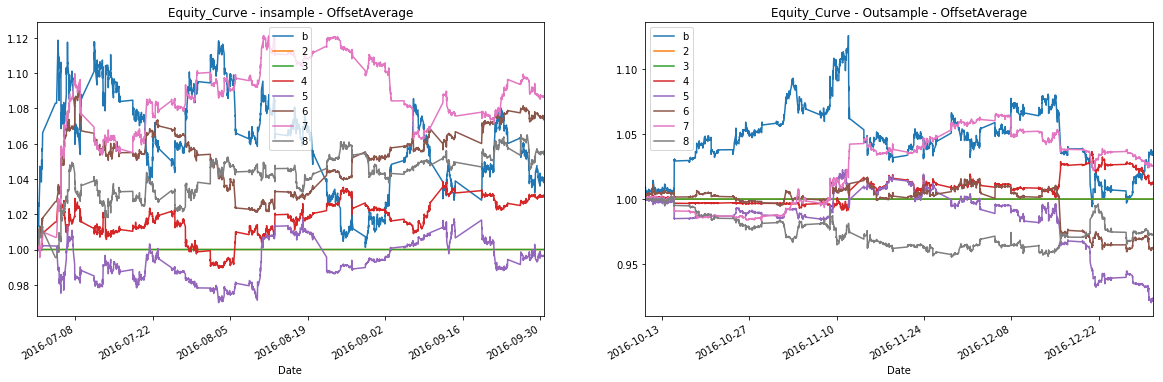

In [5]:
Ag_10min_Offset_Average_10bps = OffSetAverage(NoCost_Result_Group[10e-4])

Benchmark = Ag_10min_Offset_Average_10bps.GetBenchmark()
AveEqCurve = Ag_10min_Offset_Average_10bps.GetAveEquityCurve()

# Plot
fig, ax = plt.subplots(1,2, figsize=(20,6))
Benchmark['insample'].plot(ax=ax[0],label='b')
AveEqCurve['insample'].plot(ax=ax[0])
ax[0].legend(['b',2,3,4,5,6,7,8])
ax[0].set_title('Equity_Curve - insample - OffsetAverage')

Benchmark['outsample'].plot(ax=ax[1],label='b')
AveEqCurve['outsample'].plot(ax=ax[1])
ax[1].legend(['b',2,3,4,5,6,7,8])
ax[1].set_title('Equity_Curve - Outsample - OffsetAverage')

In [6]:
Ag_10min_Offset_Average_10bps.GetAvePerformance()['insample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,1.0,1.000000,0.000000
1,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,1.0,1.000000,0.000000
2,0.180669,0.000412,NaN,0.024289,0.010281,-0.009122,0.031940,-0.093962,NaN,0.568932,9.6,1.025508,0.485000
3,0.191036,-0.000024,-0.013263,0.013926,0.001404,-0.038119,0.046850,-0.133079,1.166927,-0.029864,34.6,1.005981,0.530586
4,0.221855,0.000962,-0.009568,0.012322,0.001118,-0.047077,0.053677,-0.126305,1.349503,1.026645,72.0,1.074713,0.482073
5,0.237073,0.001120,-0.007774,0.009431,0.000820,-0.042064,0.054071,-0.114638,1.278926,1.259171,108.6,1.087615,0.495261
6,0.208574,0.000716,-0.006399,0.007402,0.000422,-0.031060,0.034037,-0.089569,1.182509,0.711290,132.0,1.054767,0.488849


In [7]:
Ag_10min_Offset_Average_10bps.GetAvePerformance()['outsample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,1.0,1.000000,0.000000
1,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,1.0,1.000000,0.000000
2,0.173887,0.000192,NaN,NaN,0.003935,-0.021903,0.026289,-0.092903,NaN,0.316846,7.0,1.010644,0.296296
3,0.172824,-0.001099,-0.016965,0.015227,-0.004337,-0.055146,0.045229,-0.140512,1.042127,-1.730146,22.0,0.925506,0.357399
4,0.182107,-0.000523,-0.012273,0.010967,-0.000640,-0.047472,0.036852,-0.121178,0.911263,-0.691804,43.6,0.961805,0.472037
5,0.181087,0.000373,-0.008342,0.008015,0.000285,-0.045369,0.042936,-0.088479,0.989196,0.453447,68.6,1.026071,0.518747
6,0.179264,-0.000376,-0.006859,0.006997,-0.000411,-0.036986,0.049128,-0.117197,1.080512,-0.520480,90.0,0.975219,0.458374


## 1.2  Ag --- 10min offset average --- price threshold = 5bps

Text(0.5,1,'Equity_Curve - Outsample - OffsetAverage')

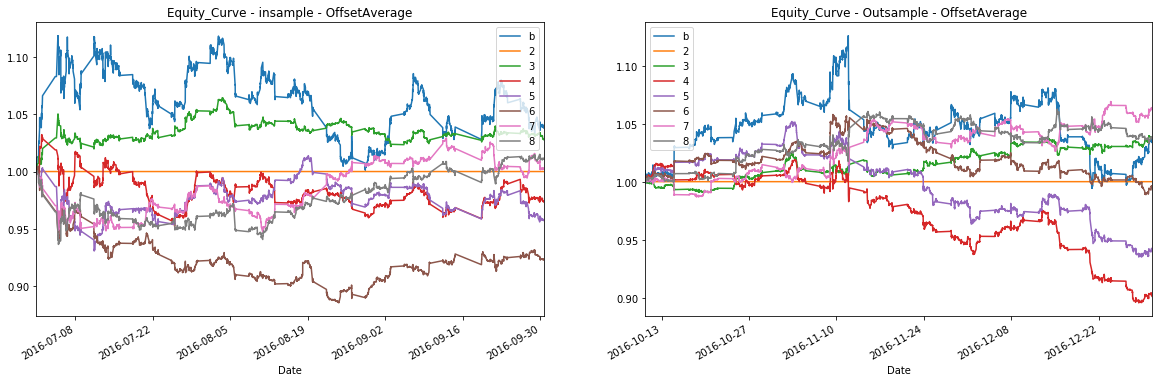

In [10]:
Ag_10min_Offset_Average_5bps = OffSetAverage(NoCost_Result_Group[5e-4])

Benchmark = Ag_10min_Offset_Average_5bps.GetBenchmark()
AveEqCurve = Ag_10min_Offset_Average_5bps.GetAveEquityCurve()

# Plot
fig, ax = plt.subplots(1,2, figsize=(20,6))
Benchmark['insample'].plot(ax=ax[0],label='b')
AveEqCurve['insample'].plot(ax=ax[0])
ax[0].legend(['b',2,3,4,5,6,7,8])
ax[0].set_title('Equity_Curve - insample - OffsetAverage')

Benchmark['outsample'].plot(ax=ax[1],label='b')
AveEqCurve['outsample'].plot(ax=ax[1])
ax[1].legend(['b',2,3,4,5,6,7,8])
ax[1].set_title('Equity_Curve - Outsample - OffsetAverage')

In [11]:
Ag_10min_Offset_Average_5bps.GetAvePerformance()['insample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,1.0,1.000000,0.000000
1,0.124277,0.000377,NaN,NaN,0.004536,-0.011019,0.030646,-0.060361,NaN,0.442958,136.0,1.025271,0.262710
2,0.220387,-0.000317,-0.005268,0.005966,-0.000034,-0.044630,0.045961,-0.123796,1.140324,-0.386335,243.8,0.971933,0.460319
3,0.246870,-0.000531,-0.004770,0.004292,-0.000171,-0.050209,0.029800,-0.131863,0.923115,-0.646150,325.0,0.958949,0.500430
4,0.220505,-0.001025,-0.003927,0.003805,-0.000193,-0.046447,0.028837,-0.163506,0.973771,-1.089843,413.4,0.925102,0.474917
5,0.211037,0.000058,-0.003077,0.003331,0.000005,-0.031333,0.027787,-0.121085,1.089841,0.046845,533.8,1.002357,0.472174
6,0.217560,0.000172,-0.003152,0.003168,0.000027,-0.040596,0.024962,-0.136452,1.007753,0.195520,531.4,1.012764,0.493899


In [12]:
Ag_10min_Offset_Average_5bps.GetAvePerformance()['outsample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.000000,0.000000,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000,NaN,0.000000,1.0,1.000000,0.000000
1,0.094707,0.000523,NaN,NaN,3.669066e-03,-0.008926,0.022566,-0.046776,NaN,0.867683,117.4,1.035776,0.264050
2,0.176587,-0.001449,-0.004385,0.004724,-4.538929e-04,-0.037584,0.024541,-0.152607,1.089489,-2.010995,215.0,0.899937,0.429394
3,0.176811,-0.000837,-0.003888,0.003768,-2.365797e-04,-0.036774,0.025867,-0.142574,0.975302,-1.220492,266.4,0.938366,0.472193
4,0.183945,-0.000056,-0.003240,0.003465,-9.054629e-07,-0.028477,0.025622,-0.116474,1.073276,-0.131764,328.2,0.994170,0.475168
5,0.174694,0.000878,-0.002789,0.003025,1.502480e-04,-0.026725,0.030225,-0.082179,1.085073,1.267156,417.6,1.061691,0.495885
6,0.169237,0.000533,-0.002624,0.002889,7.725606e-05,-0.026351,0.026538,-0.093320,1.117141,0.738042,444.0,1.038807,0.479845


## 1.3  Ag --- 10min offset average --- price threshold = 0bps

Text(0.5,1,'Equity_Curve - Outsample - OffsetAverage')

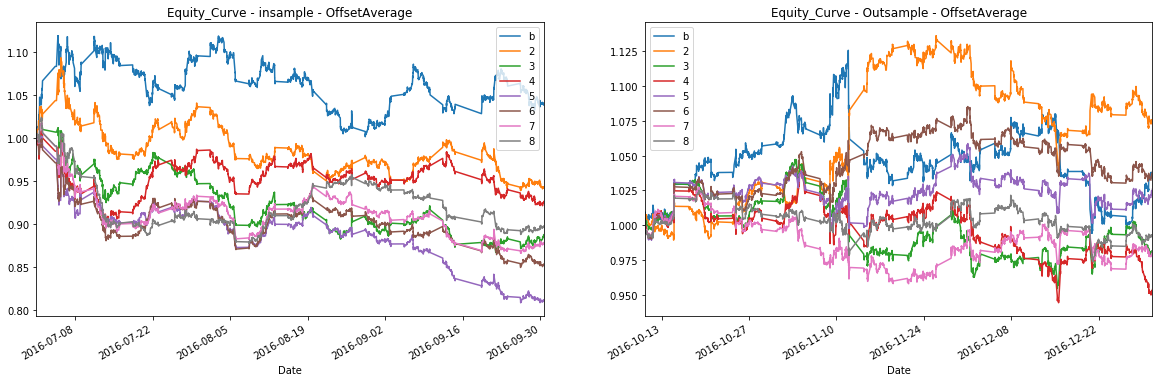

In [13]:
Ag_10min_Offset_Average_0bps = OffSetAverage(NoCost_Result_Group[0])

Benchmark = Ag_10min_Offset_Average_0bps.GetBenchmark()
AveEqCurve = Ag_10min_Offset_Average_0bps.GetAveEquityCurve()

# Plot
fig, ax = plt.subplots(1,2, figsize=(20,6))
Benchmark['insample'].plot(ax=ax[0],label='b')
AveEqCurve['insample'].plot(ax=ax[0])
ax[0].legend(['b',2,3,4,5,6,7,8])
ax[0].set_title('Equity_Curve - insample - OffsetAverage')

Benchmark['outsample'].plot(ax=ax[1],label='b')
AveEqCurve['outsample'].plot(ax=ax[1])
ax[1].legend(['b',2,3,4,5,6,7,8])
ax[1].set_title('Equity_Curve - Outsample - OffsetAverage')

In [14]:
Ag_10min_Offset_Average_0bps.GetAvePerformance()['insample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.198377,-0.000704,-0.001348,0.001950,-0.000031,-0.020536,0.054021,-0.159671,1.447846,-0.867297,1717.2,0.942103,0.380950
1,0.207245,-0.001524,-0.001695,0.001632,-0.000068,-0.035668,0.037128,-0.180736,0.970228,-1.793877,1718.6,0.887033,0.462166
2,0.191081,-0.000953,-0.001619,0.001706,-0.000042,-0.036518,0.032448,-0.139225,1.054213,-1.202419,1718.2,0.925173,0.455448
3,0.215436,-0.002691,-0.001744,0.001745,-0.000135,-0.053679,0.029532,-0.211970,1.001962,-3.108314,1533.8,0.810910,0.436761
4,0.214157,-0.002039,-0.001626,0.001707,-0.000092,-0.052482,0.029121,-0.172170,1.050177,-2.414424,1697.0,0.850941,0.438926
5,0.219745,-0.001669,-0.001696,0.001719,-0.000078,-0.047553,0.025569,-0.172769,1.015846,-1.863314,1642.6,0.876791,0.450642
6,0.217675,-0.001393,-0.001621,0.001683,-0.000060,-0.043166,0.027513,-0.179802,1.039609,-1.605476,1751.4,0.893758,0.447990


In [15]:
Ag_10min_Offset_Average_0bps.GetAvePerformance()['outsample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.176546,0.001065,-0.001078,0.001661,0.000049,-0.015196,0.030909,-0.090706,1.547485,1.518943,1556.8,1.077303,0.390513
1,0.170719,-0.000234,-0.001382,0.001348,-0.000011,-0.025000,0.024154,-0.100658,0.989462,-0.338310,1557.2,0.979767,0.472163
2,0.163432,-0.000627,-0.001316,0.001475,-0.000029,-0.024469,0.024716,-0.107248,1.122559,-0.949190,1554.6,0.953083,0.439534
3,0.171421,0.000395,-0.001396,0.001535,0.000018,-0.030395,0.024438,-0.088570,1.103887,0.609741,1392.6,1.025144,0.457985
4,0.154809,0.000565,-0.001308,0.001521,0.000025,-0.024249,0.024675,-0.080288,1.165274,0.784766,1546.2,1.039538,0.448286
5,0.168683,-0.000245,-0.001355,0.001462,-0.000012,-0.027802,0.023887,-0.118204,1.079602,-0.360113,1531.0,0.979263,0.450950
6,0.172241,-0.000085,-0.001312,0.001419,-0.000006,-0.024038,0.023708,-0.101209,1.087643,-0.120969,1617.4,0.992192,0.452628


## 2 Fixed Trading Cost

## 2.1 Ag --- 10min offset average --- price threshold = 10bps

Text(0.5,1,'Equity_Curve - Outsample - OffsetAverage')

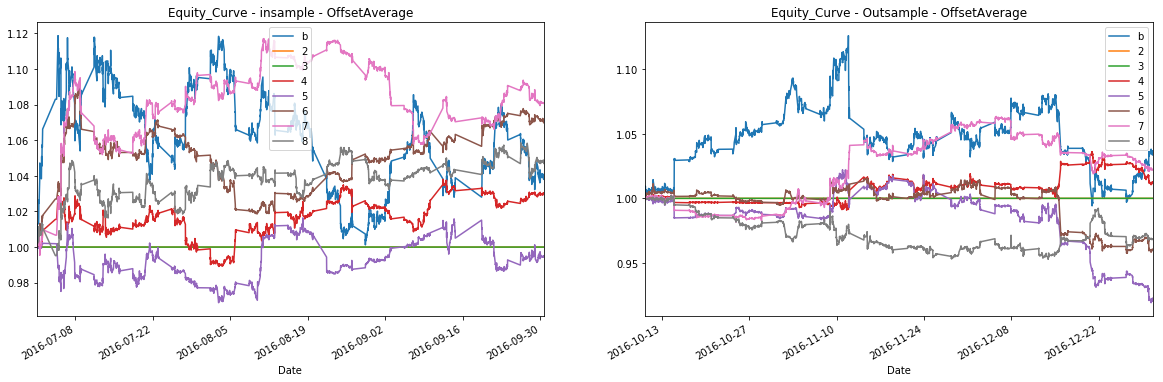

In [16]:
Ag_10min_Offset_Average_10bps = OffSetAverage(FixedCost_Result_Group[10e-4])

Benchmark = Ag_10min_Offset_Average_10bps.GetBenchmark()
AveEqCurve = Ag_10min_Offset_Average_10bps.GetAveEquityCurve()

# Plot
fig, ax = plt.subplots(1,2, figsize=(20,6))
Benchmark['insample'].plot(ax=ax[0],label='b')
AveEqCurve['insample'].plot(ax=ax[0])
ax[0].legend(['b',2,3,4,5,6,7,8])
ax[0].set_title('Equity_Curve - insample - OffsetAverage')

Benchmark['outsample'].plot(ax=ax[1],label='b')
AveEqCurve['outsample'].plot(ax=ax[1])
ax[1].legend(['b',2,3,4,5,6,7,8])
ax[1].set_title('Equity_Curve - Outsample - OffsetAverage')

In [17]:
Ag_10min_Offset_Average_10bps.GetAvePerformance()['insample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.000091,-6.578947e-07,-0.000050,NaN,-0.000050,-0.000050,-0.000050,0.000000,NaN,-1.813691,1.0,0.999950,0.000000
1,0.000091,-6.578947e-07,-0.000050,NaN,-0.000050,-0.000050,-0.000050,0.000000,NaN,-1.813691,1.0,0.999950,0.000000
2,0.180674,4.056284e-04,-0.002731,0.024239,0.010231,-0.009172,0.031890,-0.094249,399.443333,0.561148,9.6,1.025006,0.485000
3,0.191031,-4.708065e-05,-0.012066,0.014106,0.001354,-0.038169,0.046800,-0.133951,1.325476,-0.058460,34.6,1.004319,0.522423
4,0.221755,9.150321e-04,-0.009351,0.012272,0.001068,-0.047127,0.053627,-0.127960,1.374705,0.973322,72.0,1.070865,0.482073
5,0.237016,1.048141e-03,-0.007579,0.009434,0.000770,-0.042114,0.054021,-0.115999,1.318916,1.183741,108.6,1.081747,0.493240
6,0.208509,6.287079e-04,-0.006195,0.007479,0.000372,-0.031110,0.033987,-0.091035,1.225282,0.606539,132.0,1.047837,0.479536


In [18]:
Ag_10min_Offset_Average_10bps.GetAvePerformance()['outsample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.000094,-7.042254e-07,-0.000050,NaN,-0.000050,-0.000050,-0.000050,0.000000,NaN,-1.876467,1.0,0.999950,0.000000
1,0.000094,-7.042254e-07,-0.000050,NaN,-0.000050,-0.000050,-0.000050,0.000000,NaN,-1.876467,1.0,0.999950,0.000000
2,0.173892,1.873089e-04,-0.008558,NaN,0.003885,-0.021953,0.026239,-0.092950,NaN,0.309508,7.0,1.010287,0.296296
3,0.172807,-1.114278e-03,-0.015372,0.015177,-0.004387,-0.055196,0.045179,-0.140917,1.140990,-1.752502,22.0,0.924480,0.357399
4,0.182073,-5.540968e-04,-0.011475,0.010917,-0.000690,-0.047522,0.036802,-0.122129,0.965968,-0.733553,43.6,0.959727,0.472037
5,0.180994,3.243541e-04,-0.008098,0.007965,0.000235,-0.045419,0.042886,-0.089236,1.014776,0.388044,68.6,1.022531,0.518747
6,0.179380,-4.398714e-04,-0.006659,0.007015,-0.000461,-0.037036,0.049078,-0.118742,1.114241,-0.609487,90.0,0.970796,0.453658


## 2.2  Ag --- 10min offset average --- price threshold = 5bps

Text(0.5,1,'Equity_Curve - Outsample - OffsetAverage')

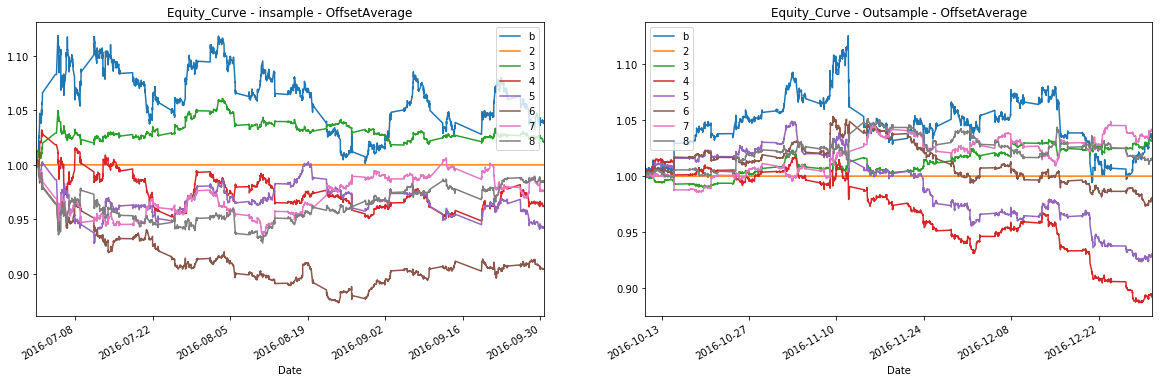

In [19]:
Ag_10min_Offset_Average_5bps = OffSetAverage(FixedCost_Result_Group[5e-4])

Benchmark = Ag_10min_Offset_Average_5bps.GetBenchmark()
AveEqCurve = Ag_10min_Offset_Average_5bps.GetAveEquityCurve()

# Plot
fig, ax = plt.subplots(1,2, figsize=(20,6))
Benchmark['insample'].plot(ax=ax[0],label='b')
AveEqCurve['insample'].plot(ax=ax[0])
ax[0].legend(['b',2,3,4,5,6,7,8])
ax[0].set_title('Equity_Curve - insample - OffsetAverage')

Benchmark['outsample'].plot(ax=ax[1],label='b')
AveEqCurve['outsample'].plot(ax=ax[1])
ax[1].legend(['b',2,3,4,5,6,7,8])
ax[1].set_title('Equity_Curve - Outsample - OffsetAverage')

In [20]:
Ag_10min_Offset_Average_5bps.GetAvePerformance()['insample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.000091,-6.578947e-07,-0.000050,NaN,-0.000050,-0.000050,-0.000050,0.000000,NaN,-1.813691,1.0,0.999950,0.000000
1,0.124639,2.875063e-04,-0.001409,NaN,0.004486,-0.011069,0.030596,-0.061967,NaN,-0.393237,136.0,1.018230,0.260938
2,0.220478,-4.772283e-04,-0.005154,0.005973,-0.000084,-0.044680,0.045911,-0.129622,1.172801,-0.575754,243.8,0.960286,0.455367
3,0.246710,-7.450934e-04,-0.004604,0.004311,-0.000221,-0.050259,0.029750,-0.136770,0.959150,-0.861877,325.0,0.943383,0.492058
4,0.220394,-1.296606e-03,-0.003765,0.003858,-0.000243,-0.046497,0.028787,-0.174003,1.029220,-1.399325,413.4,0.906150,0.462183
5,0.211014,-2.930523e-04,-0.002948,0.003373,-0.000045,-0.031383,0.027737,-0.129197,1.151953,-0.371978,533.8,0.975915,0.459370
6,0.217416,-1.777348e-04,-0.003025,0.003200,-0.000023,-0.040646,0.024912,-0.145908,1.060693,-0.207510,531.4,0.986240,0.481394


In [21]:
Ag_10min_Offset_Average_5bps.GetAvePerformance()['outsample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.000094,-7.042254e-07,-0.000050,NaN,-0.000050,-0.000050,-0.000050,0.000000,NaN,-1.876467,1.0,0.999950,0.000000
1,0.094886,4.399653e-04,-0.001057,NaN,0.003619,-0.008976,0.022516,-0.047642,NaN,-0.025996,117.4,1.029524,0.258560
2,0.176886,-1.599959e-03,-0.004276,0.004745,-0.000504,-0.037634,0.024491,-0.159777,1.125246,-2.220145,215.0,0.890434,0.421488
3,0.177153,-1.024590e-03,-0.003795,0.003787,-0.000287,-0.036824,0.025817,-0.149512,1.002477,-1.495960,266.4,0.925951,0.464408
4,0.184049,-2.868148e-04,-0.003127,0.003502,-0.000051,-0.028527,0.025572,-0.123681,1.121944,-0.447456,328.2,0.978047,0.463471
5,0.174559,5.839049e-04,-0.002660,0.003057,0.000100,-0.026775,0.030175,-0.089878,1.149691,0.843590,417.6,1.039753,0.482881
6,0.169363,2.199415e-04,-0.002514,0.002901,0.000027,-0.026401,0.026488,-0.099765,1.170001,0.275881,444.0,1.015922,0.469486


## 2.3  Ag --- 10min offset average --- price threshold = 0

Text(0.5,1,'Equity_Curve - Outsample - OffsetAverage')

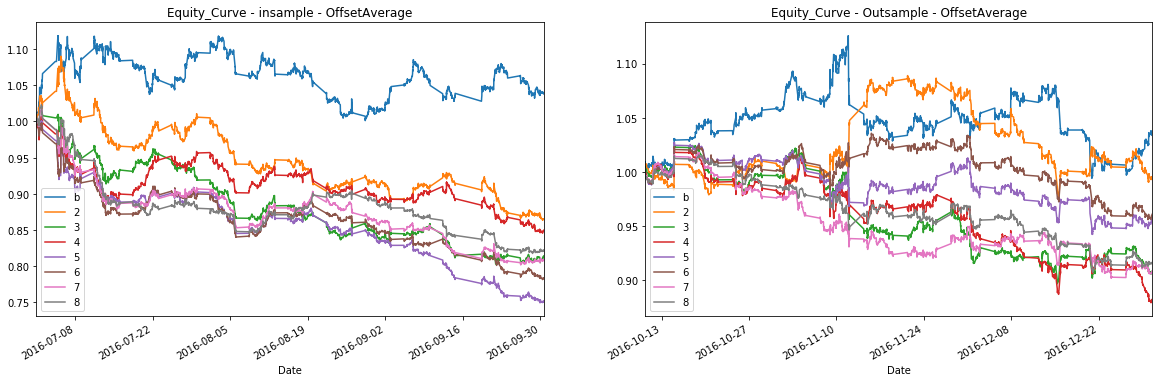

In [22]:
Ag_10min_Offset_Average_0bps = OffSetAverage(FixedCost_Result_Group[0e-4])

Benchmark = Ag_10min_Offset_Average_0bps.GetBenchmark()
AveEqCurve = Ag_10min_Offset_Average_0bps.GetAveEquityCurve()

# Plot
fig, ax = plt.subplots(1,2, figsize=(20,6))
Benchmark['insample'].plot(ax=ax[0],label='b')
AveEqCurve['insample'].plot(ax=ax[0])
ax[0].legend(['b',2,3,4,5,6,7,8])
ax[0].set_title('Equity_Curve - insample - OffsetAverage')

Benchmark['outsample'].plot(ax=ax[1],label='b')
AveEqCurve['outsample'].plot(ax=ax[1])
ax[1].legend(['b',2,3,4,5,6,7,8])
ax[1].set_title('Equity_Curve - Outsample - OffsetAverage')

In [23]:
Ag_10min_Offset_Average_0bps.GetAvePerformance()['insample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.200589,-0.001834,-0.001269,0.001985,-0.000081,-0.020586,0.053971,-0.217659,1.566760,-2.268444,1717.2,0.864566,0.365110
1,0.207224,-0.002655,-0.001538,0.001633,-0.000118,-0.035718,0.037078,-0.238082,1.069459,-3.162762,1718.6,0.813965,0.448085
2,0.190875,-0.002083,-0.001508,0.001723,-0.000092,-0.036568,0.032398,-0.179380,1.143435,-2.695626,1718.2,0.848992,0.438324
3,0.215037,-0.003700,-0.001598,0.001764,-0.000185,-0.053729,0.029482,-0.263889,1.105084,-4.294277,1533.8,0.751086,0.420478
4,0.214114,-0.003156,-0.001504,0.001727,-0.000142,-0.052532,0.029071,-0.227930,1.148433,-3.731154,1697.0,0.781724,0.421876
5,0.220037,-0.002749,-0.001557,0.001733,-0.000128,-0.047603,0.025519,-0.226906,1.115356,-3.101261,1642.6,0.807606,0.434480
6,0.217613,-0.002546,-0.001493,0.001682,-0.000110,-0.043216,0.027463,-0.226594,1.127461,-2.931425,1751.4,0.818867,0.435405


In [24]:
Ag_10min_Offset_Average_0bps.GetAvePerformance()['outsample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.178551,-0.000031,-0.001007,0.001690,-0.000001,-0.015246,0.030859,-0.111751,1.684559,-0.032771,1556.8,0.996619,0.372915
1,0.171339,-0.001331,-0.001255,0.001332,-0.000061,-0.025050,0.024104,-0.135202,1.077014,-1.953101,1557.2,0.906363,0.460610
2,0.163970,-0.001722,-0.001221,0.001489,-0.000079,-0.024519,0.024666,-0.147536,1.220568,-2.627672,1554.6,0.881803,0.421518
3,0.171794,-0.000586,-0.001283,0.001535,-0.000032,-0.030445,0.024388,-0.111197,1.200829,-0.830553,1392.6,0.955969,0.443621
4,0.155515,-0.000524,-0.001207,0.001530,-0.000025,-0.024299,0.024625,-0.116266,1.269998,-0.977075,1546.2,0.962101,0.431682
5,0.169219,-0.001323,-0.001242,0.001460,-0.000062,-0.027852,0.023837,-0.147723,1.176427,-1.967633,1531.0,0.907036,0.436602
6,0.172923,-0.001224,-0.001209,0.001408,-0.000056,-0.024088,0.023658,-0.142353,1.172914,-1.772507,1617.4,0.914774,0.440278
